# Data Investigation - Status Data

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

font = {'size'   : 50}
matplotlib.rc('font', **font)

LABEL_FONT_SIZE = 15
TITLE_FONT_SIZE = 25

### Import Data

In [3]:
file = '../clean_data/status_data_cleaned_5m_final.csv'

chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True, parse_dates=['time'], index_col=0):

    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1
    
status_data = pd.DataFrame()
status_data = pd.concat(chunks)

status_data.set_index('time', inplace=True)
status_data.info()

	[00:39:16.209030] finished chunk 1 of 2175
	[00:39:23.961999] finished chunk 218 of 2175
	[00:39:32.016854] finished chunk 436 of 2175
	[00:39:39.006497] finished chunk 654 of 2175
	[00:39:49.481512] finished chunk 872 of 2175
	[00:39:58.253968] finished chunk 1090 of 2175
	[00:40:06.792466] finished chunk 1308 of 2175
	[00:40:14.782744] finished chunk 1526 of 2175
	[00:40:23.302743] finished chunk 1744 of 2175
	[00:40:31.962569] finished chunk 1962 of 2175
	[00:40:39.556371] finished chunk 2175 of 2175
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21747135 entries, 2013-08-29 12:05:00 to 2016-08-31 23:55:00
Data columns (total 5 columns):
station_id         int64
bikes_available    float64
docks_available    float64
dock_count         int64
utilization        float64
dtypes: float64(3), int64(2)
memory usage: 995.5 MB


In [4]:
status_data.head(3)

,station_id,bikes_available,docks_available,dock_count,utilization
time,,,,,
2013-08-29 12:05:00,2,2.0,25.0,27,0.925926
2013-08-29 12:10:00,2,2.0,25.0,27,0.925926
2013-08-29 12:15:00,2,2.0,25.0,27,0.925926


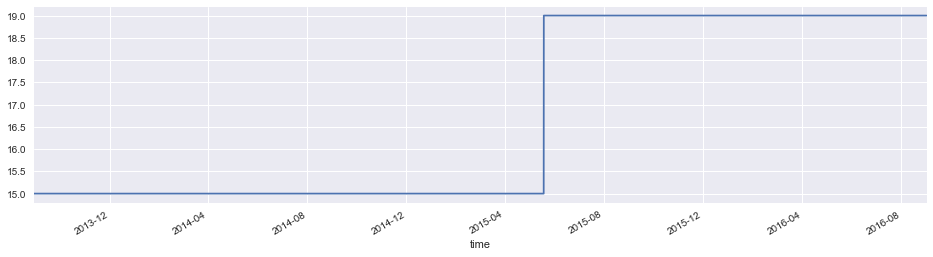

In [5]:
status_data[status_data.station_id == 73].groupby('station_id').dock_count.plot(figsize=(16,4))
plt.show()

In [6]:
station_73_pre  = status_data[(status_data.station_id == 73) & (status_data.dock_count == 15)]
station_73_post = status_data[(status_data.station_id == 73) & (status_data.dock_count == 19)]

In [7]:
def hypothesis_test(A, B):
    # calculate Means
    A_data = A.copy()
    B_data = B.copy()

    A_mean = A_data.mean()
    B_mean = B_data.mean()
    diff_mean = A_mean - B_mean

    # Variance
    A_var = A_data.var()
    B_var = B_data.var()

    # Length
    A_count = len(A_data)
    B_count = len(B_data)
    
    # Junk
    A_sum = A_data.sum()
    B_sum = B_data.sum()

    # Standard Deviation
    std_error = math.sqrt(A_var/A_count + B_var/B_count)

    # Margin of Error
    margin = 1.96*std_error

    # calculate t statistic and p value with scipy
    t, p = stats.ttest_ind(A_data, B_data)

    reject_null = False

    if p < 0.05:
        reject_null = True
    else:
        reject_null = False

    result = [A_mean, B_mean, A_sum, B_sum, A_count, B_count, diff_mean, std_error, margin, t, p, reject_null]

    return result

## Station 73 Overall Usage Before and After Expansion

In [8]:
# Station 73 Utilization

data_A = station_73_pre.utilization
data_B = station_73_post.utilization

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Utilization')
print('-' * 80)
print('Station Pre Expansion Mean Utilization\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Utilization\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t%s'                  % station_test_results[11])

Station 73 Before and After Expansion - Utilization
--------------------------------------------------------------------------------
Station Pre Expansion Mean Utilization		0.47956
Station Post Expansion Mean Utilization		0.42022
Difference of Means				0.05934
Standard Error					0.00085
Margin of Error					0.00166
T-Score						70.01692
P-Value						0.0
Can Reject Null			True


In [9]:
# Station 73 Utilization

data_A = station_73_pre.bikes_available
data_B = station_73_post.bikes_available

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Bikes Available')
print('-' * 80)
print('Station Pre Expansion Mean Avaiable Bike Count\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Avaiable Bike Count\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])

Station 73 Before and After Expansion - Bikes Available
--------------------------------------------------------------------------------
Station Pre Expansion Mean Avaiable Bike Count		7.78900
Station Post Expansion Mean Avaiable Bike Count		8.09316
Difference of Means					-0.30415
Standard Error						0.01434
Margin of Error						0.02811
T-Score							-21.80973
P-Value							2.24686384718e-105
Can Reject Null				True


In [10]:
# Station 73 Utilization

data_A = station_73_pre.docks_available
data_B = station_73_post.docks_available

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Docks Available')
print('-' * 80)
print('Station Pre Expansion Mean Avaiable Dock Count\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Avaiable Dock Count\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])

Station 73 Before and After Expansion - Docks Available
--------------------------------------------------------------------------------
Station Pre Expansion Mean Avaiable Dock Count		7.19340
Station Post Expansion Mean Avaiable Dock Count		7.98411
Difference of Means					-0.79072
Standard Error						0.01477
Margin of Error						0.02895
T-Score							-55.37624
P-Value							0.0
Can Reject Null				True


## Station 73 Overall Usage Before and After Expansion - Morning Commute Hours Only

In [11]:
status_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21747135 entries, 2013-08-29 12:05:00 to 2016-08-31 23:55:00
Data columns (total 5 columns):
station_id         int64
bikes_available    float64
docks_available    float64
dock_count         int64
utilization        float64
dtypes: float64(3), int64(2)
memory usage: 995.5 MB


In [12]:
# prune only morning commute hours from subscribers [07:00 - 11:00]
am_commute_start = datetime.datetime.strptime('07:00', '%H:%M').time()
am_commute_end = datetime.datetime.strptime('11:00', '%H:%M').time()
morning_commute_status = status_data.between_time(start_time=am_commute_start,
                                                     end_time=am_commute_end,
                                                     include_start=True,
                                                     include_end=True)

morning_commute_status = morning_commute_status[morning_commute_status.index.dayofweek < 5 ]


morning_commute_station_73_pre  = morning_commute_status[(morning_commute_status.station_id == 73) & (morning_commute_status.dock_count == 15)]
morning_commute_station_73_post = morning_commute_status[(morning_commute_status.station_id == 73) & (morning_commute_status.dock_count == 19)]

morning_commute_station_73_post.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16508 entries, 2015-05-19 07:00:00 to 2016-08-31 11:00:00
Data columns (total 5 columns):
station_id         16508 non-null int64
bikes_available    16508 non-null float64
docks_available    16508 non-null float64
dock_count         16508 non-null int64
utilization        16508 non-null float64
dtypes: float64(3), int64(2)
memory usage: 773.8 KB


In [13]:
# Station 73 Utilization
data_A = morning_commute_station_73_pre.utilization
data_B = morning_commute_station_73_post.utilization

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Utilization')
print('-' * 80)
print('Station Pre Expansion Mean Utilization\t\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Utilization\t\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])

print()

# Station 73 Bikes Available
data_A = morning_commute_station_73_pre.bikes_available
data_B = morning_commute_station_73_post.bikes_available

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Bikes Available')
print('-' * 80)
print('Station Pre Expansion Mean Avaiable Bike Count\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Avaiable Bike Count\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])


print()
# Station 73 Docks Available
data_A = morning_commute_station_73_pre.docks_available
data_B = morning_commute_station_73_post.docks_available

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Docks Available')
print('-' * 80)
print('Station Pre Expansion Mean Avaiable Dock Count\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Avaiable Dock Count\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])

Station 73 Before and After Expansion - Utilization
--------------------------------------------------------------------------------
Station Pre Expansion Mean Utilization			0.54754
Station Post Expansion Mean Utilization			0.48415
Difference of Means					0.06339
Standard Error						0.00266
Margin of Error						0.00521
T-Score							23.34471
P-Value							1.06793146288e-119
Can Reject Null				True

Station 73 Before and After Expansion - Bikes Available
--------------------------------------------------------------------------------
Station Pre Expansion Mean Avaiable Bike Count		6.75708
Station Post Expansion Mean Avaiable Bike Count		6.88658
Difference of Means					-0.12951
Standard Error						0.04603
Margin of Error						0.09021
T-Score							-2.85528
P-Value							0.00430221317577
Can Reject Null				True

Station 73 Before and After Expansion - Docks Available
--------------------------------------------------------------------------------
Station Pre Expansion Mean Avaiable Dock C

## Station 73 Overall Usage Before and After Expansion - Evening Commute Hours Only

In [14]:
# prune only evening commute hours from subscribers [16:00 - 20:00]
pm_commute_start = datetime.datetime.strptime('16:00', '%H:%M').time()
pm_commute_end = datetime.datetime.strptime('20:00', '%H:%M').time()
evening_commute_status = status_data.between_time(start_time=pm_commute_start,
                                                     end_time=pm_commute_end,
                                                     include_start=True,
                                                     include_end=True)

evening_commute_status = evening_commute_status[evening_commute_status.index.dayofweek < 5 ]

evening_commute_station_73_pre  = evening_commute_status[(evening_commute_status.station_id == 73) & (evening_commute_status.dock_count == 15)]
evening_commute_station_73_post = evening_commute_status[(evening_commute_status.station_id == 73) & (evening_commute_status.dock_count == 19)]

evening_commute_status.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2646815 entries, 2013-08-29 16:00:00 to 2016-08-31 20:00:00
Data columns (total 5 columns):
station_id         int64
bikes_available    float64
docks_available    float64
dock_count         int64
utilization        float64
dtypes: float64(3), int64(2)
memory usage: 121.2 MB


In [15]:
# Station 73 Utilization
data_A = evening_commute_station_73_pre.utilization
data_B = evening_commute_station_73_post.utilization

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Utilization')
print('-' * 80)
print('Station Pre Expansion Mean Utilization\t\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Utilization\t\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])

print()

# Station 73 Bikes Available
data_A = evening_commute_station_73_pre.bikes_available
data_B = evening_commute_station_73_post.bikes_available

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Bikes Available')
print('-' * 80)
print('Station Pre Expansion Mean Avaiable Bike Count\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Avaiable Bike Count\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])


print()
# Station 73 Docks Available
data_A = evening_commute_station_73_pre.docks_available
data_B = evening_commute_station_73_post.docks_available

station_test_results  = hypothesis_test(data_A, data_B)
print('Station 73 Before and After Expansion - Docks Available')
print('-' * 80)
print('Station Pre Expansion Mean Avaiable Dock Count\t\t%0.5f'   % station_test_results[0])
print('Station Post Expansion Mean Avaiable Dock Count\t\t%0.5f'  % station_test_results[1])
print('Difference of Means\t\t\t\t\t%0.5f'         % station_test_results[6])
print('Standard Error\t\t\t\t\t\t%0.5f'            % station_test_results[7])
print('Margin of Error\t\t\t\t\t\t%0.5f'           % station_test_results[8])
print('T-Score\t\t\t\t\t\t\t%0.5f'                 % station_test_results[9])
print('P-Value\t\t\t\t\t\t\t%s'                    % station_test_results[10])
print('Can Reject Null\t\t\t\t%s'                  % station_test_results[11])

Station 73 Before and After Expansion - Utilization
--------------------------------------------------------------------------------
Station Pre Expansion Mean Utilization			0.51602
Station Post Expansion Mean Utilization			0.51074
Difference of Means					0.00528
Standard Error						0.00228
Margin of Error						0.00447
T-Score							2.30331
P-Value							0.0212669977929
Can Reject Null				True

Station 73 Before and After Expansion - Bikes Available
--------------------------------------------------------------------------------
Station Pre Expansion Mean Avaiable Bike Count		7.23036
Station Post Expansion Mean Avaiable Bike Count		6.35269
Difference of Means					0.87767
Standard Error						0.03463
Margin of Error						0.06787
T-Score							25.31649
P-Value							2.98965814488e-140
Can Reject Null				True

Station 73 Before and After Expansion - Docks Available
--------------------------------------------------------------------------------
Station Pre Expansion Mean Avaiable Dock Coun